In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [ ]:
# link the drive path

dataset_dir = '/content/drive/MyDrive/Colab Notebooks/DL-Assignment'

In [ ]:
# Image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training subset
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.


In [ ]:
# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)  # Adjust number of classes automatically

model = Model(inputs=base_model.input, outputs=x)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # You can increase this if needed
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 4208s 10s/step - accuracy: 0.6908 - loss: 0.9285 - val_accuracy: 0.9167 - val_loss: 0.2357
Epoch 2/10
  1/400 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9688 - loss: 0.1647

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9688 - loss: 0.1647 - val_accuracy: 0.9333 - val_loss: 0.1500
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 51s 126ms/step - accuracy: 0.9455 - loss: 0.1722 - val_accuracy: 0.9624 - val_loss: 0.1128
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 0.9667 - val_loss: 0.1059
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 123ms/step - accuracy: 0.9667 - loss: 0.1050 - val_accuracy: 0.9508 - val_loss: 0.1524
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - accuracy: 0.9375 - loss: 0.1456 - val_accuracy: 0.9667 - val_loss: 0.0975
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 123ms/step - accuracy: 0.9672 - loss: 0.0933 - val_accuracy: 0.9681 - val_loss: 0.0947
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.9667 - val_loss: 0.1034
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 123ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accu

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9527 - loss: 0.1276
Validation Accuracy: 96.25%


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/tomato_classification_model.h5')

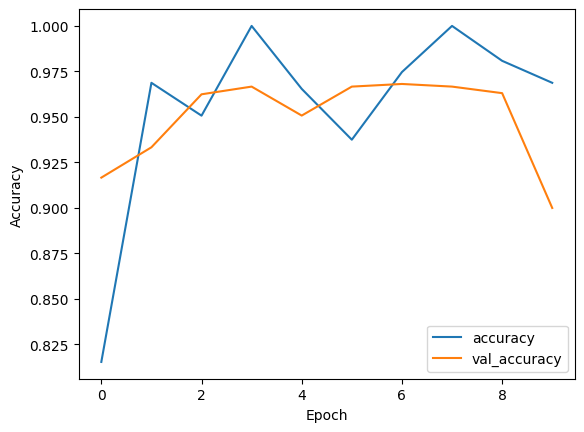

In [ ]:
# Plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()